In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import select_features
import seaborn as sns
sns.set()
archivo = '..\data\ISBSG - Release May 2017 R1.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Effort Build', 'Effort Test', 'Effort Implement','Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used', 'Sprints / iterations size']
df = df.loc[:, variables]
filtro = df['Agile Method Used'] == 'Yes'
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'NESMA'
df = df.loc[filtro, :]
df = df.dropna(subset=['Sprints / iterations size'])
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df = df.drop(columns=['Summary Work Effort' ,'Effort Build', 'Effort Test', 'Effort Implement', 'Data Quality Rating', 'UFP rating', 'Count Approach', 'Agile Method Used'])
df

48


,Industry Sector,Application Group,Development Type,Language Type,Primary Programming Language,Functional Size,Normalised Work Effort Level 1,Project Elapsed Time,Used Methodology,Resource Level,Sprints / iterations size
210,Government,Onshore,Enhancement,4GL,Oracle,54.0,608.0,1,Yes,1.0,42
861,Government,Onshore,Enhancement,4GL,Oracle,75.0,641.0,1,Yes,1.0,74
1020,Government,Onshore,Enhancement,4GL,Oracle,159.0,596.0,1,Yes,1.0,88
1093,Government,Onshore,Enhancement,4GL,Oracle,88.0,515.0,1,Yes,1.0,36
1238,Government,Onshore,New development,4GL,Oracle,66.0,241.0,1,Yes,1.0,31
1252,Government,Onshore,Enhancement,4GL,Oracle,51.0,632.0,1,Yes,1.0,47
1268,Government,Onshore,Enhancement,4GL,Oracle,149.0,708.0,1,Yes,1.0,71
1330,Government,Onshore,New development,4GL,Oracle,90.0,238.0,1,Yes,1.0,"47,5"
1572,Government,Onshore,Enhancement,4GL,Oracle,69.0,661.0,1,Yes,1.0,52
1606,Government,Onshore,Enhancement,4GL,Oracle,72.0,574.0,1,Yes,1.0,59


Functional Size                 9.731881e-01
Sprints / iterations size       9.622377e-01
Primary Programming Language    2.246628e-01
Development Type                2.246628e-01
Project Elapsed Time            5.173562e-02
Resource Level                  2.911344e-17
Used Methodology                2.911344e-17
Language Type                   2.911344e-17
Application Group               2.911344e-17
Industry Sector                 2.911344e-17
dtype: float64


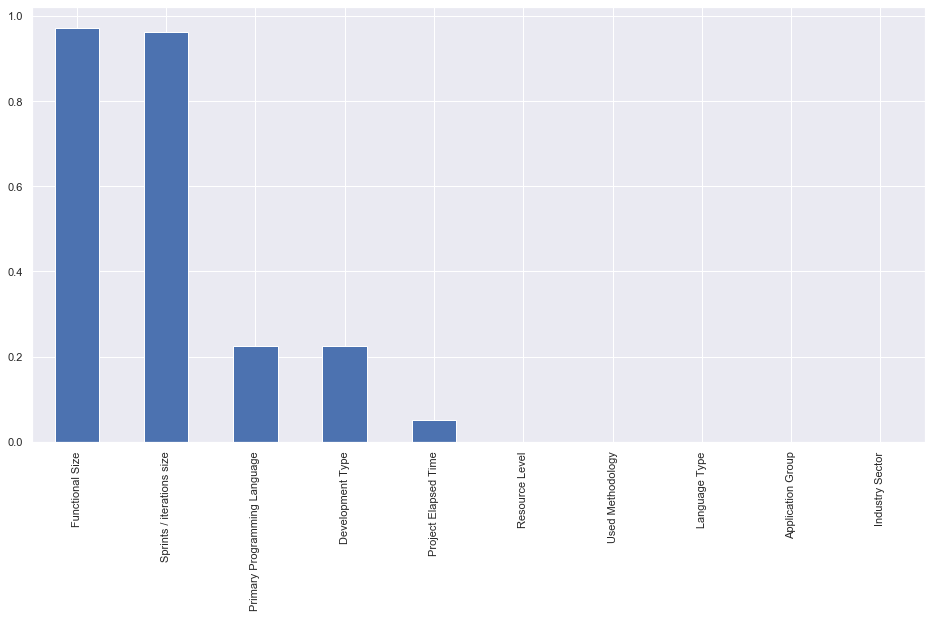

In [19]:
mi = select_features.calcular_mi_manual('Normalised Work Effort Level 1', df)
mi.plot.bar(figsize=(16,8))
print(mi)

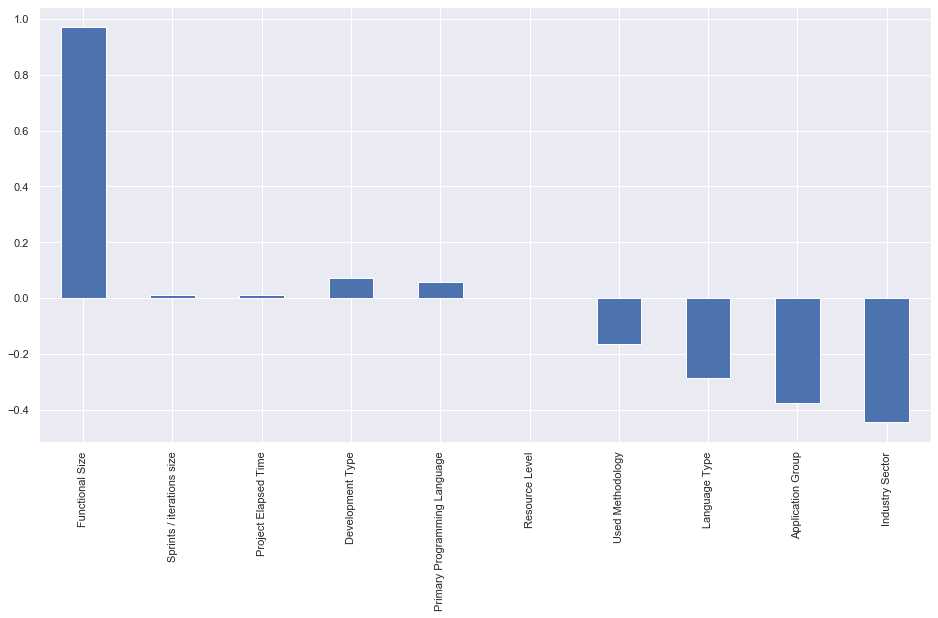

In [20]:
mrmr = select_features.calcular_mrmr_v2('Normalised Work Effort Level 1', df)
mrmr.plot.bar(figsize=(16, 8))